https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/01_Simple_Linear_Model.ipynb

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [51]:
import math
def rate(p):
    result=[]
    result.append(round(math.pow(1-p, 3),3))
    result.append(round(3*p*math.pow(1-p,2),3))
    result.append(round(3*p*p*(1-p),3))
    result.append(round(math.pow(p,3),3))
    result.append(round(1-math.pow(1-p,3),3))
    return result
print("success rate of 0.7 is: ", rate(0.7))
print("success rate of 0.6 is: ", rate(0.6))
print("success rate of 0.5 is: ", rate(0.5))
print("success rate of 0.4 is: ", rate(0.4))
print("success rate of 0.3 is: ", rate(0.3))
print("success rate of 0.2 is: ", rate(0.2))


success rate of 0.7 is:  [0.027, 0.189, 0.441, 0.343, 0.973]
success rate of 0.6 is:  [0.064, 0.288, 0.432, 0.216, 0.936]
success rate of 0.5 is:  [0.125, 0.375, 0.375, 0.125, 0.875]
success rate of 0.4 is:  [0.216, 0.432, 0.288, 0.064, 0.784]
success rate of 0.3 is:  [0.343, 0.441, 0.189, 0.027, 0.657]
success rate of 0.2 is:  [0.512, 0.384, 0.096, 0.008, 0.488]


In [2]:
tf.__version__


'1.4.0'

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
data=input_data.read_data_sets("data/MNIST/", one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [5]:
data.train.images.shape

(55000, 784)

In [6]:
data.train.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [7]:
data.train.labels.shape

(55000, 10)

In [8]:
print(data.test.images.shape)
print(data.test.labels.shape)

(10000, 784)
(10000, 10)


In [26]:
data.validation.labels.shape

(5000, 10)

In [24]:
data.test.cls=np.array([label.argmax() for label in data.test.labels])
data.test.cls[0:6]

array([7, 2, 1, 0, 4, 1], dtype=int64)

In [13]:
img_size=28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes=10

In [22]:
def plot_img(imgs, cls_true, cls_pred=None):
    assert len(imgs)==len(cls_true)==9
    fig, axes = plt.subplots(3,3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(imgs[i].reshape(img_shape), cmap='binary')
        if cls_pred is None:
            xlabel="True: {0}".format(cls_true[i])
        else:
            xlabel="True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])

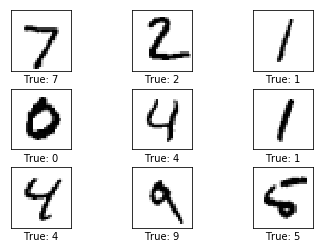

In [25]:
plot_img(data.test.images[0:9], data.test.cls[0:9])

In [26]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])

In [27]:
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))
bias = tf.Variable(tf.zeros([num_classes]))

In [28]:
logits = tf.matmul(x, weights)+bias
y_pred = tf.nn.softmax(logits)
y_pred_cls=tf.argmax(y_pred, axis=1)

In [29]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_true)

In [30]:
cost = tf.reduce_mean(cross_entropy)

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5).minimize(cost)

In [32]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [33]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [34]:
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)

In [66]:
batch_size = 100
def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x:x_batch, y_true: y_true_batch}
        session.run(optimizer, feed_dict = feed_dict_train)

In [53]:
feed_dict_test={x:data.test.images, y_true:data.test.labels, y_true_cls:data.test.cls}

def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [92]:
def print_confusion_matrix():
    cls_true = data.test.cls
    cls_pred = session.run(y_pred_cls, feed_dict = feed_dict_test)
    
    cm = confusion_matrix(y_true = cls_true, y_pred = cls_pred)
    print("confusion matrix is: ", cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel("predicted")
    plt.ylabel("true")

In [61]:
def plot_example_errors():
    correct, cls_pred = session.run([correct_prediction, y_pred_cls], feed_dict = feed_dict_test)
    incorrect = (correct==False)
    images = data.test.images[incorrect]
    cls_pred = cls_pred[incorrect]
    cls_true = data.test.cls[incorrect]
    plot_img(imgs = images[0:9], cls_true = cls_true[0:9], cls_pred = cls_pred[0:9])

In [85]:
def plot_weights():
    w=session.run(weights)
    w_min=np.min(w)
    w_max=np.max(w)
    
    fig, axes = plt.subplots(3,4)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, ax in enumerate(axes.flat):
        if i<10:
            image=w[:,i].reshape(img_shape)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')
            
    ax.set_xticks([])
    ax.set_yticks([])

### Performance before any optimization

In [57]:
print_accuracy()

Accuracy on test-set: 9.8%


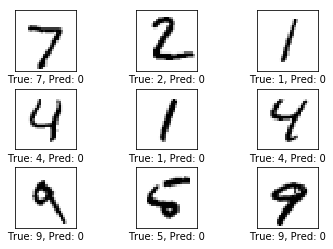

In [62]:
plot_example_errors()

### performance after 1 optimization iteration

In [67]:
optimize(num_iterations=1)


In [68]:
print_accuracy()

Accuracy on test-set: 18.9%


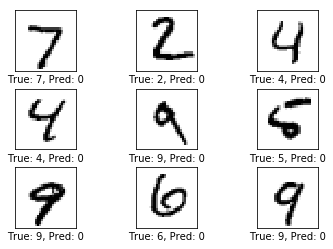

In [69]:
plot_example_errors()

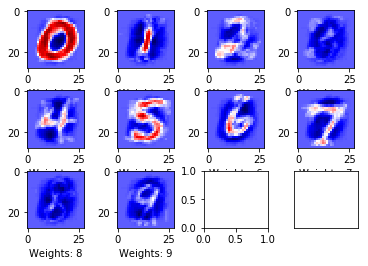

In [86]:
plot_weights()

### performance after 10 optimization iterations

Accuracy on test-set: 74.9%


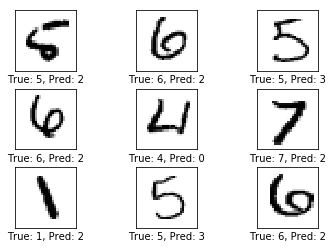

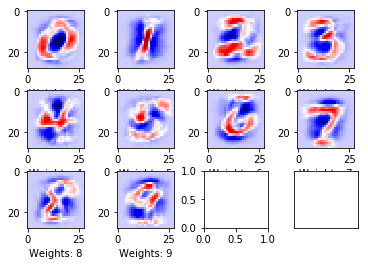

In [88]:
optimize(num_iterations=9)
print_accuracy()
plot_example_errors()
plot_weights()

### Performance after 1000 optimization iterations

Accuracy on test-set: 92.0%


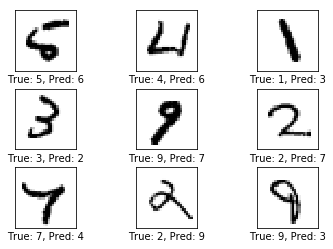

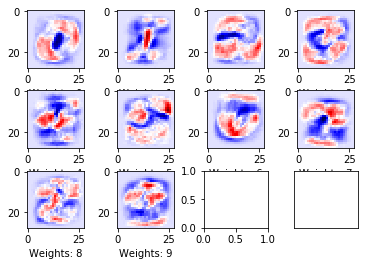

In [90]:
optimize(num_iterations=990)
print_accuracy()
plot_example_errors()
plot_weights()

confusion matrix is:  [[ 956    0    2    3    0    3   10    3    3    0]
 [   0 1105    3    3    0    2    4    2   16    0]
 [   8    4  918   18   10    1   15   16   35    7]
 [   3    0   16  938    0   18    2   12   14    7]
 [   1    1    3    1  900    0   16    5    9   46]
 [   9    3    3   46    9  757   19   11   28    7]
 [  10    3    4    2    9   12  915    1    2    0]
 [   1    6   20    9    6    0    0  955    3   28]
 [   5    3    9   37    9   27   15   13  848    8]
 [  11    5    2   11   22    6    0   34    9  909]]


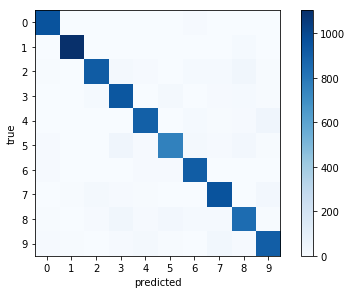

In [93]:
print_confusion_matrix()

In [94]:
session.close()